[*********************100%***********************]  1 of 1 completed


[(2, array([2210.76196289])), (3, array([2269.03808594])), (5, array([2241.62475586])), (7, array([2333.03271484])), (11, array([2524.46020508])), (12, array([2576.59790039])), (13, array([2472.24121094])), (14, array([2511.36376953])), (16, array([2528.36938477])), (18, array([2489.49853516])), (19, array([2469.58911133])), (25, array([2267.19970703])), (30, array([2282.54443359])), (31, array([2303.82470703])), (46, array([2803.69140625])), (48, array([2878.99804688])), (51, array([2970.35546875])), (54, array([2992.38598633])), (59, array([3341.91967773])), (60, array([3435.05395508])), (64, array([3554.96459961])), (65, array([3819.22631836])), (69, array([3881.19311523])), (70, array([4066.44506836])), (71, array([3980.27319336])), (72, array([4006.45703125])), (73, array([3883.14038086])), (76, array([3642.41308594])), (77, array([3517.98510742])), (79, array([3513.39306641])), (81, array([3333.68798828])), (83, array([3454.63647461])), (86, array([3500.11523438])), (87, array([3

<ipython-input-1-45364f9a17c3>:82: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ratio = float(ratio)  # Ensure ratio is a float


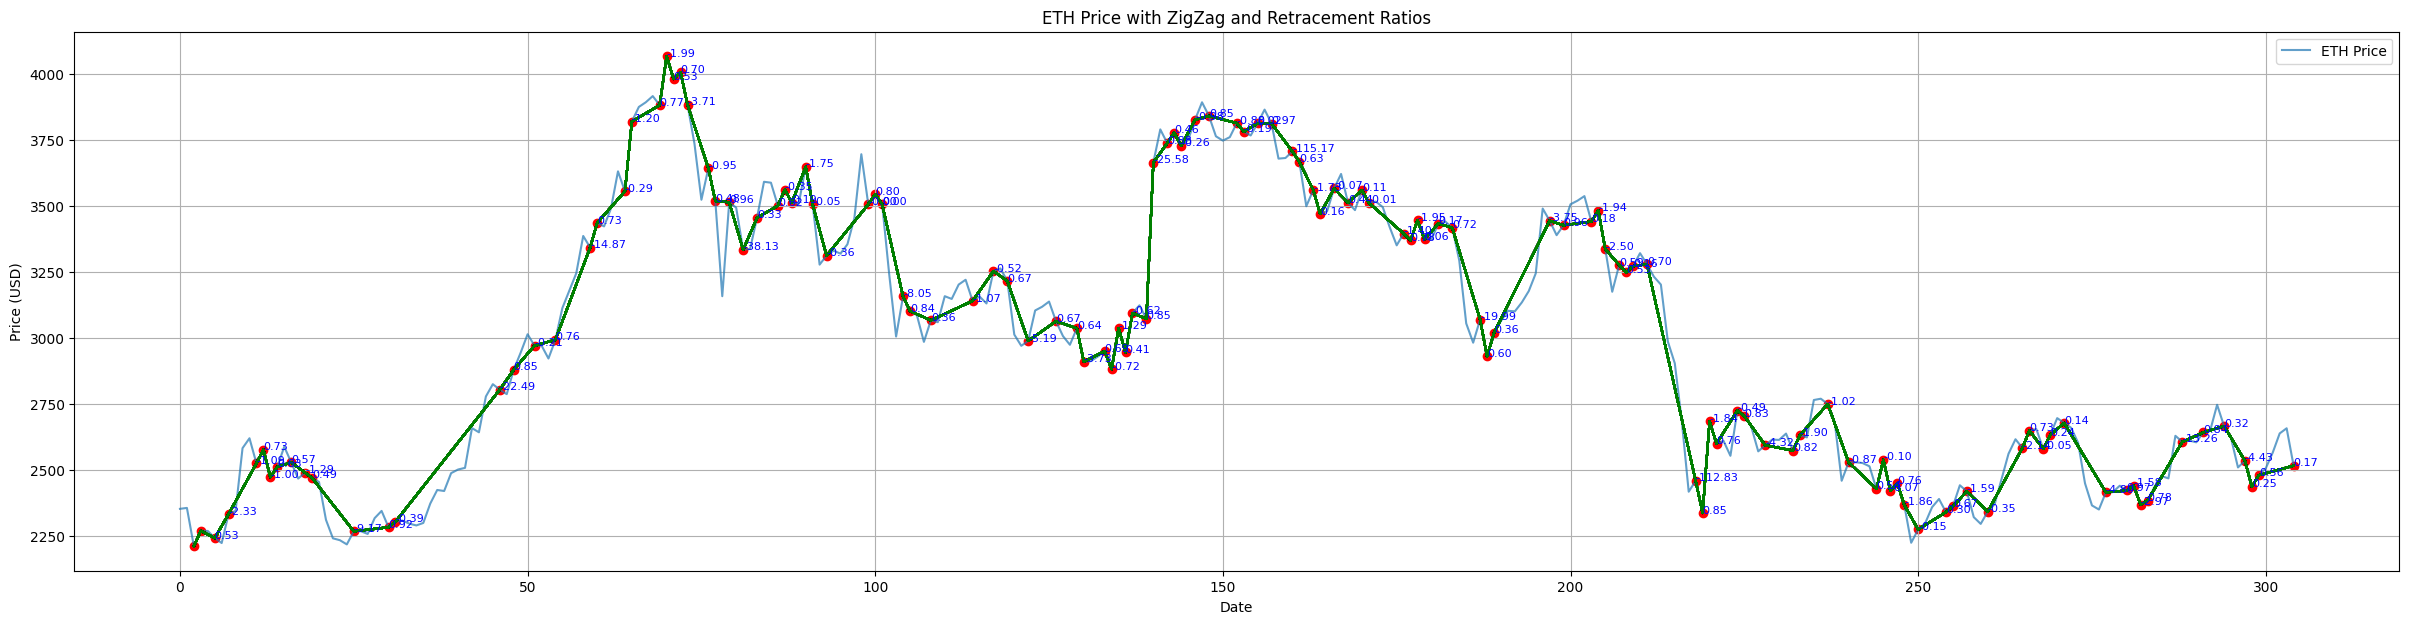

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ZigZag calculation function
def calculate_zigzag(prices, base_threshold, scaling_factor):
    peaks = []
    direction = None  # 'up' or 'down'
    last_peak = prices[0]


    for i, price in enumerate(prices):
        # Calculate current percentage change
        change = abs(last_peak - price) / last_peak

        # Adjust threshold dynamically based on percentage change
        adjusted_threshold = base_threshold * (1 + change / scaling_factor)

        if direction is None:
            if change > adjusted_threshold and price > last_peak:
                direction = 'up'
                peaks.append((i, price))
                last_peak = price
            elif change > adjusted_threshold and price < last_peak:
                direction = 'down'
                peaks.append((i, price))
                last_peak = price
        elif direction == 'up' and price < last_peak and change > adjusted_threshold:
            direction = 'down'
            peaks.append((i, price))
            last_peak = price
        elif direction == 'down' and price > last_peak and change > adjusted_threshold:
            direction = 'up'
            peaks.append((i, price))
            last_peak = price

        last_peak = price

    return peaks

# Fetch Ethereum price data
eth_data = yf.download("ETH-USD", start="2024-01-01", end="2024-11-01")
eth_prices = eth_data['Close']

# Handle NaN values
eth_prices = eth_prices.dropna()  # Remove NaN values
eth_prices = eth_prices.astype(float)  # Ensure all data is numeric

# Calculate ZigZag
threshold = 0.006
scaling_factor = 1  # Adjust sensitivity
zigzag = calculate_zigzag(eth_prices.values, threshold, scaling_factor)
print(zigzag)
# Calculate retracement ratios
retracement_ratios = []
for i in range(2, len(zigzag)):  # Start from 2 to ensure enough points for length calculation
    # Calculate previous and current lengths
    previous_length = abs(zigzag[i - 1][1] - zigzag[i - 2][1])
    current_length = abs(zigzag[i][1] - zigzag[i - 1][1])

    # Calculate retracement ratio
    if previous_length != 0:  # Avoid division by zero
        retracement = (previous_length - current_length) / previous_length
        retracement_ratios.append((zigzag[i][0], retracement))



# Plot ZigZag and retracement ratios
plt.figure(figsize=(30, 7))

# Plot prices and ZigZag
plt.plot(eth_prices.values, label='ETH Price', alpha=0.7)
for i, price in zigzag:
    plt.scatter(i, price, color='red')
    plt.plot([i for i, _ in zigzag], [price for _, price in zigzag], color='green', alpha=0.5)

# Annotate retracement ratios
for idx, ratio in retracement_ratios:
    idx = int(idx)  # Ensure idx is an integer
    price_value = eth_prices.values[idx]
    ratio = float(ratio)  # Ensure ratio is a float
    plt.text(idx, price_value, f"{ratio:.2f}", color="blue", fontsize=8)

plt.title("ETH Price with ZigZag and Retracement Ratios")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid()
plt.show()


[*********************100%***********************]  1 of 1 completed


[(3, array([2269.03808594])), (11, array([2524.46020508])), (12, array([2576.59790039])), (13, array([2472.24121094])), (10, array([2619.61914062])), (15, array([2587.69116211])), (16, array([2528.36938477])), (25, array([2267.19970703])), (30, array([2282.54443359])), (36, array([2372.2019043])), (64, array([3554.96459961])), (65, array([3819.22631836])), (71, array([3980.27319336])), (76, array([3642.41308594])), (77, array([3517.98510742])), (79, array([3513.39306641])), (78, array([3157.61816406])), (78, array([3157.61816406])), (86, array([3500.11523438])), (90, array([3647.85644531])), (91, array([3505.0300293])), (97, array([3453.49462891])), (99, array([3505.16333008])), (98, array([3695.29272461])), (104, array([3156.94189453])), (103, array([3004.90039062])), (107, array([2984.72753906])), (108, array([3066.02758789])), (114, array([3139.80517578])), (117, array([3252.16821289])), (120, array([3012.28686523])), (123, array([3103.54199219])), (126, array([3062.72875977])), (12

<ipython-input-52-beea0b5c5cde>:103: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ratio = float(ratio)  # Ensure ratio is a float


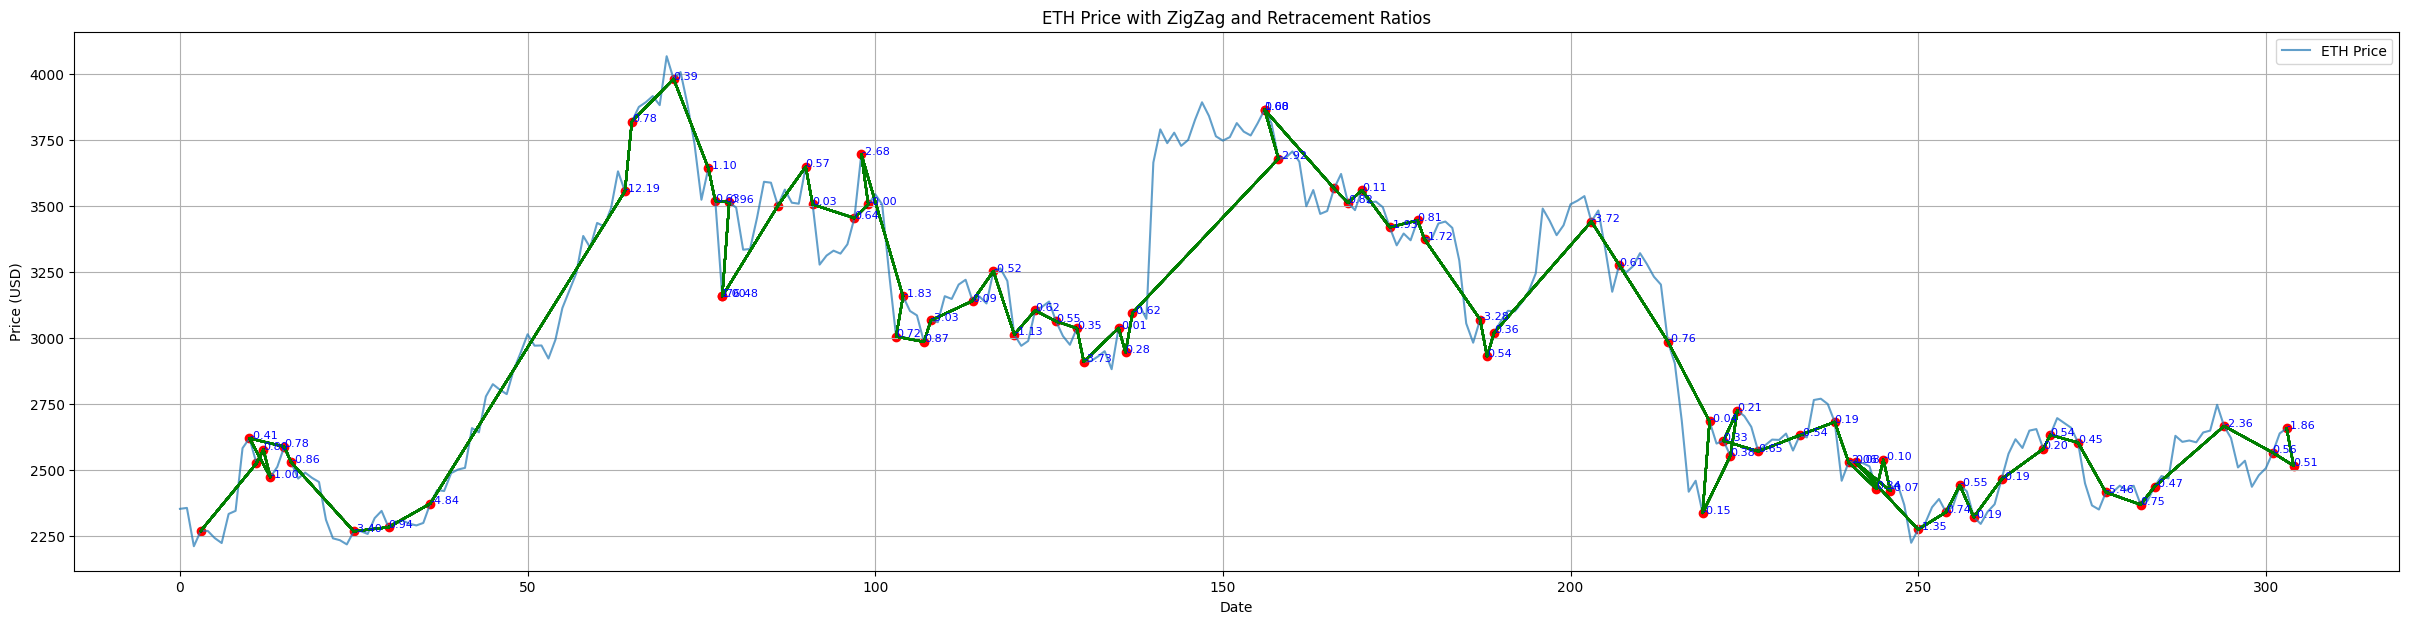

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def calculate_zigzag(prices, base_threshold, scaling_factor):
    peaks = []
    direction = None  # 'up' or 'down'
    last_peak = prices[0]
    last_peak_index = 0
    temp_peak = None

    for i, price in enumerate(prices):
        # Calculate current percentage change
        change = abs(last_peak - price) / last_peak

        # Adjust threshold dynamically based on percentage change
        adjusted_threshold = base_threshold * (1 + change / scaling_factor)

        if direction is None:
            if change > adjusted_threshold and price > last_peak:
                direction = 'up'
                temp_peak = (i, price)
            elif change > adjusted_threshold and price < last_peak:
                direction = 'down'
                temp_peak = (i, price)
        elif direction == 'up':
            if price < last_peak:  # 방향 전환 가능성
                if temp_peak and (price / temp_peak[1]) - 1 >= 0.03:  # 3% 이상 상승
                    peaks.append(temp_peak)
                    last_peak = temp_peak[1]
                    last_peak_index = temp_peak[0]
                elif change > adjusted_threshold:
                    direction = 'down'
                    peaks.append((i, price))
                    last_peak = price
                    last_peak_index = i
            elif price > last_peak:
                temp_peak = (i, price)  # 임시 피크 갱신
        elif direction == 'down':
            if price > last_peak:  # 방향 전환 가능성
                if temp_peak and (temp_peak[1] / price) - 1 >= 0.03:  # 3% 이상 하락
                    peaks.append(temp_peak)
                    last_peak = temp_peak[1]
                    last_peak_index = temp_peak[0]
                elif change > adjusted_threshold:
                    direction = 'up'
                    peaks.append((i, price))
                    last_peak = price
                    last_peak_index = i
            elif price < last_peak:
                temp_peak = (i, price)  # 임시 피크 갱신

        last_peak = price

    # 마지막 임시 피크 처리
    if temp_peak and temp_peak[0] != last_peak_index:
        peaks.append(temp_peak)

    return peaks


# Fetch Ethereum price data
eth_data = yf.download("ETH-USD", start="2024-01-01", end="2024-11-01")
eth_prices = eth_data['Close']

# Handle NaN values
eth_prices = eth_prices.dropna()  # Remove NaN values
eth_prices = eth_prices.astype(float)  # Ensure all data is numeric

# Calculate ZigZag
threshold = 0.02
scaling_factor = 1  # Adjust sensitivity
zigzag = calculate_zigzag(eth_prices.values, threshold, scaling_factor)
print(zigzag)
# Calculate retracement ratios
retracement_ratios = []
for i in range(2, len(zigzag)):  # Start from 2 to ensure enough points for length calculation
    # Calculate previous and current lengths
    previous_length = abs(zigzag[i - 1][1] - zigzag[i - 2][1])
    current_length = abs(zigzag[i][1] - zigzag[i - 1][1])

    # Calculate retracement ratio
    if previous_length != 0:  # Avoid division by zero
        retracement = (previous_length - current_length) / previous_length
        retracement_ratios.append((zigzag[i][0], retracement))



# Plot ZigZag and retracement ratios
plt.figure(figsize=(30, 7))

# Plot prices and ZigZag
plt.plot(eth_prices.values, label='ETH Price', alpha=0.7)
for i, price in zigzag:
    plt.scatter(i, price, color='red')
    plt.plot([i for i, _ in zigzag], [price for _, price in zigzag], color='green', alpha=0.5)

# Annotate retracement ratios
for idx, ratio in retracement_ratios:
    idx = int(idx)  # Ensure idx is an integer
    price_value = eth_prices.values[idx]
    ratio = float(ratio)  # Ensure ratio is a float
    plt.text(idx, price_value, f"{ratio:.2f}", color="blue", fontsize=8)

plt.title("ETH Price with ZigZag and Retracement Ratios")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid()
plt.show()


[*********************100%***********************]  1 of 1 completed


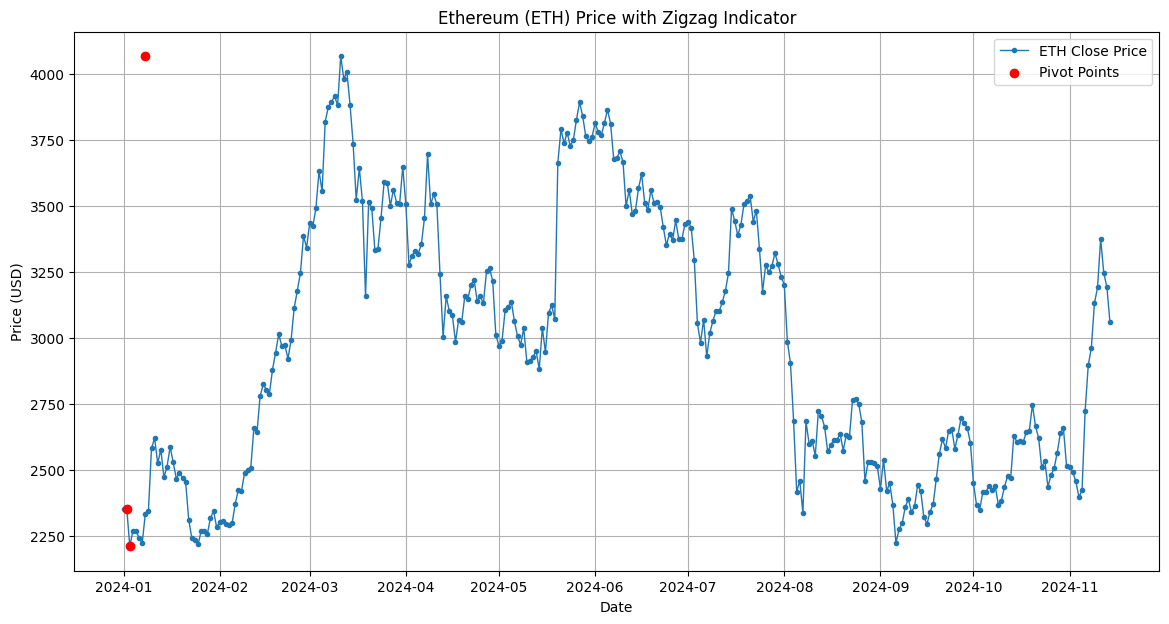

In [ ]:
from pickle import TRUE
def zigzag(data, threshold=0.05):
    """
    Zigzag 알고리즘 구현.
    :param data: 입력 데이터 시리즈 (가격 등)
    :param threshold: 변동률 임계값 (예: 5% -> 0.05)
    :return: 변곡점 리스트 (인덱스, 값)
    """
    if len(data) == 0 or len(data) < 2:
        return []

    pivot_points = []  # 변곡점을 저장할 리스트
    last_pivot_idx = 0  # 마지막 변곡점의 인덱스
    last_pivot = data.iat[0]  # 마지막 변곡점 값 (iat로 스칼라 값 보장)
    peak = data.iat[0]  # 무시된 구간 중 가장 높은 값
    trough = data.iat[0]  # 무시된 구간 중 가장 낮은 값
    in_uptrend = None  # 현재 상승/하락 상태

    for i in range(1, len(data)):
        change = (data.iat[i] - last_pivot) / last_pivot  # iat로 스칼라 값 보장

        if in_uptrend is None:  # 초기 상태
            in_uptrend = change > 0
            last_pivot = data.iat[i]
            last_pivot_idx = i
            continue

        if in_uptrend:  # 상승 중
            if change > 0:
                peak = max(peak, data.iat[i])  # iat로 스칼라 값 보장
            elif abs(change) > threshold:  # 하락으로 전환
                pivot_points.append((last_pivot_idx, peak))  # 이전 최대값 기록
                last_pivot = data.iat[i]
                last_pivot_idx = i
                trough = data.iat[i]
                in_uptrend = False
        else:  # 하락 중
            if change < 0:
                trough = min(trough, data.iat[i])  # iat로 스칼라 값 보장
            elif abs(change) > threshold:  # 상승으로 전환
                pivot_points.append((last_pivot_idx, trough))  # 이전 최소값 기록
                last_pivot = data.iat[i]
                last_pivot_idx = i
                peak = data.iat[i]
                in_uptrend = True

    # 마지막 변곡점 추가
    if in_uptrend:
        pivot_points.append((last_pivot_idx, peak))
    else:
        pivot_points.append((last_pivot_idx, trough))

    return pivot_points


# 이더리움 가격 데이터 가져오기
eth_data = yf.download('ETH-USD', start='2024-01-01', end='2024-11-15')

# 종가(Close) 데이터 추출
eth_close = eth_data[['Close']]  # 'Close' 컬럼을 DataFrame으로 가져오기
eth_close = eth_close.squeeze()  # DataFrame에서 Series로 변환

# Zigzag 알고리즘 적용
threshold = 0.05  # 5% 변동률
pivot_points = zigzag(eth_close, threshold)

# 변곡점 분리
pivot_indices, pivot_values = zip(*pivot_points)

# 날짜 인덱스 추출
pivot_dates = eth_close.index[list(pivot_indices)]

# 그래프 그리기
plt.figure(figsize=(14, 7))
plt.plot(eth_close.index, eth_close.values, label="ETH Close Price", marker='o', markersize=3, linewidth=1)
plt.scatter(pivot_dates, pivot_values, color='red', label="Pivot Points", zorder=5)
plt.title("Ethereum (ETH) Price with Zigzag Indicator")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid()
plt.show()


In [ ]:
pip install stock-indicators


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.1/184.1 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.7/295.7 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 3.0 MB/s eta 0:00:00


In [ ]:
from stock_indicators import indicators

# fetch historical quotes from your feed (your method)
quotes = get_historical_quotes("MSFT")

# calculate 20-period SMA
results = indicators.get_sma(quotes, 20)

# use results as needed for your use case (example only)
for r in results:
    print(f"SMA on {r.date.date()} was ${r.sma or 0:.4f}")

ImportError: Stock Indicators for Python has a dependency on CLR.
Install .NET SDK 6.0 (or newer) in your environment to add the required CLR capability.

In [ ]:
pip install fredapi

In [ ]:
from fredapi import Fred

# API 키 입력
api_key = "https://api.stlouisfed.org/fred/releases?api_key=abcdefghijklmnopqrstuvwxyz123456"
fred = Fred(api_key=api_key)

# CPI 데이터 가져오기 (미국의 CPI-U)
cpi_data = fred.get_series('CPIAUCSL')

print(cpi_data)

ValueError: Bad Request.  The value for variable api_key is not a 32 character alpha-numeric lower-case string.  Read https://fred.stlouisfed.org/docs/api/api_key.html for more information.

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import time

def fetch_nvda_earnings():
    url = "https://www.nasdaq.com/market-activity/stocks/nvda/earnings"

    # 크롬 드라이버 설정
    driver = webdriver.Chrome(executable_path="path_to_chromedriver")
    driver.get(url)


    # 실적 데이터 가져오기
    try:
        earnings_element = driver.find_element(By.XPATH, 'xpath_to_earnings_element')
        earnings_data = earnings_element.text
        print("NVIDIA 실적 데이터:")
        print(earnings_data)
    except Exception as e:
        print("실적 데이터를 가져오는 데 실패:", e)
    finally:
        driver.quit()

fetch_nvda_earnings()

TypeError: WebDriver.__init__() got an unexpected keyword argument 'executable_path'

In [ ]:
pip install selenium

[*********************100%***********************]  1 of 1 completed
<ipython-input-19-30ff10e5288f>:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  btc[('Volume', 'BTC-USD')] = btc[('Volume', 'BTC-USD')].replace(0, np.nan).fillna(method='bfill')  # Handling cases where volume is 0


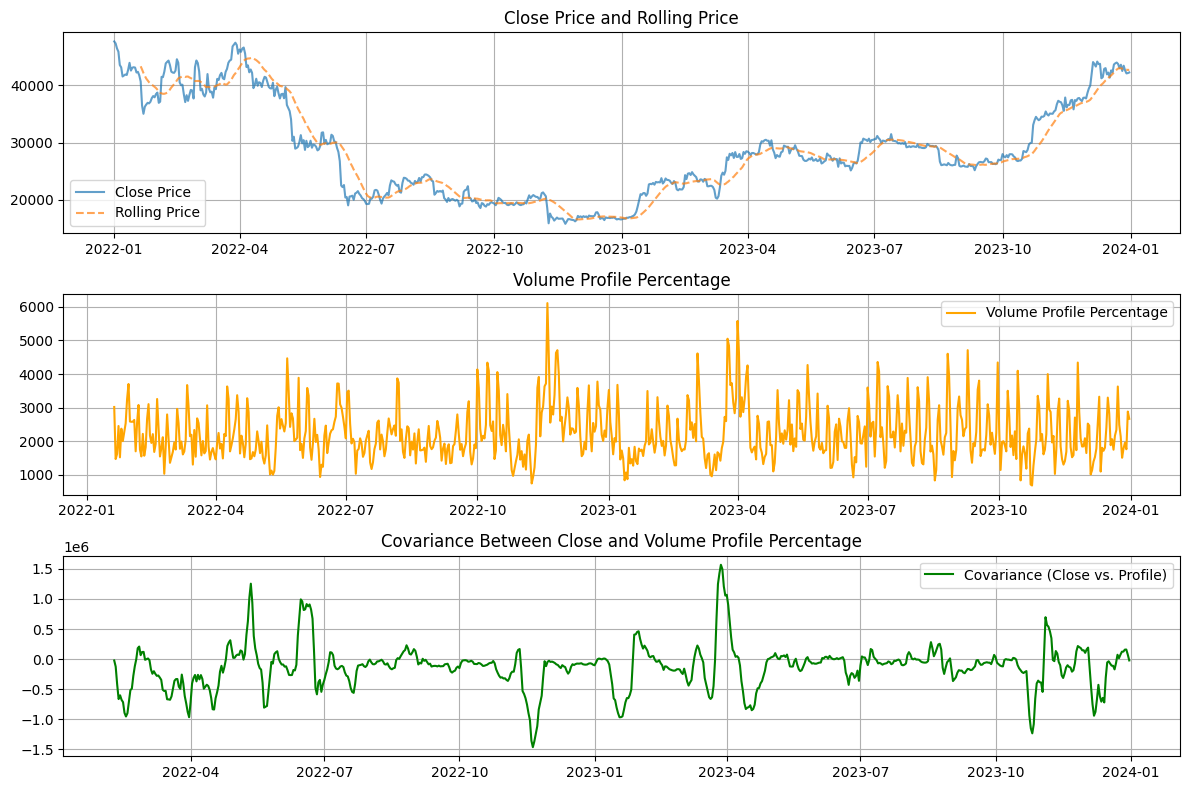

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Get BTC price data
btc = yf.download("BTC-USD", start="2022-01-01", end="2024-01-01", interval="1d")
btc[('Volume', 'BTC-USD')] = btc[('Volume', 'BTC-USD')].replace(0, np.nan).fillna(method='bfill')  # Handling cases where volume is 0

# 2. Calculate Volume Profile (formerly 매몰대)
window = 20  # Define a window size
btc[('Rolling', 'Volume')] = btc[('Volume', 'BTC-USD')].rolling(window).sum()
btc[('Rolling', 'Price')] = btc[('Close', 'BTC-USD')].rolling(window).mean()

# Classify Volume Profile position
btc[('Volume_Profile', 'Position')] = np.where(btc[('Rolling', 'Price')] < btc[('Close', 'BTC-USD')], -1, 1)

# 3. Compare next day's Close
btc[('Next', 'Close')] = btc[('Close', 'BTC-USD')].shift(-1)
btc[('Change', 'Close')] = np.where(btc[('Next', 'Close')] < btc[('Close', 'BTC-USD')], -1, 1)

# Combine Volume Profile and Close results
btc[('Volume_Profile', 'Result')] = btc[('Volume_Profile', 'Position')] * btc[('Change', 'Close')]

# 4. Calculate Covariance between Volume Profile percentage and Close prices
btc[('Volume_Profile', 'Percentage')] = (btc[('Rolling', 'Volume')] / btc[('Volume', 'BTC-USD')]) * 100
btc[('Covariance', 'Close_Profile')] = btc[('Close', 'BTC-USD')].rolling(window).apply(
    lambda x: np.cov(x, btc.loc[x.index, ('Volume_Profile', 'Percentage')])[0][1]
)

# Plotting
plt.figure(figsize=(12, 8))

# Plot 1: Close Price and Rolling Price
plt.subplot(3, 1, 1)
plt.plot(btc.index, btc[('Close', 'BTC-USD')], label='Close Price', alpha=0.7)
plt.plot(btc.index, btc[('Rolling', 'Price')], label='Rolling Price', alpha=0.7, linestyle='--')
plt.title("Close Price and Rolling Price")
plt.legend()
plt.grid()

# Plot 2: Volume Profile Percentage
plt.subplot(3, 1, 2)
plt.plot(btc.index, btc[('Volume_Profile', 'Percentage')], label='Volume Profile Percentage', color='orange')
plt.title("Volume Profile Percentage")
plt.legend()
plt.grid()

# Plot 3: Covariance
plt.subplot(3, 1, 3)
plt.plot(btc.index, btc[('Covariance', 'Close_Profile')], label='Covariance (Close vs. Profile)', color='green')
plt.title("Covariance Between Close and Volume Profile Percentage")
plt.legend()
plt.grid()

# Show the plots
plt.tight_layout()
plt.show()


[*********************100%***********************]  1 of 1 completed
<ipython-input-36-5f1d41b98259>:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  btc['Volume'] = btc[('Volume', 'BTC-USD')].replace(0, np.nan).fillna(method='bfill')  # Handle cases where volume is 0


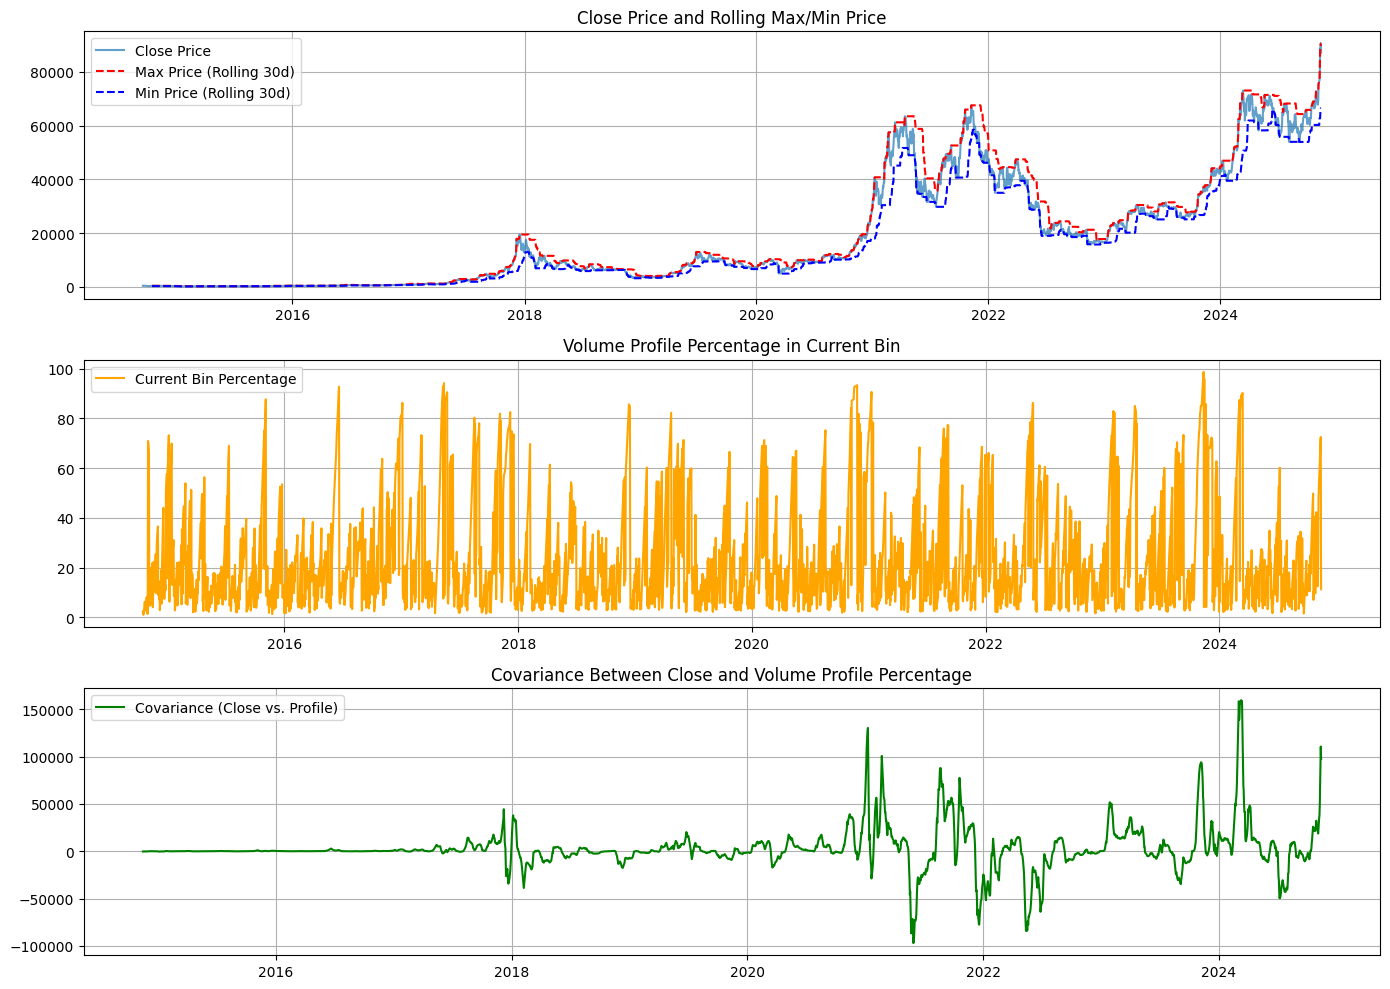

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Get BTC price data
btc = yf.download("BTC-USD", start="2005-01-01", end="2024-11-16", interval="1d")
btc['Volume'] = btc[('Volume', 'BTC-USD')].replace(0, np.nan).fillna(method='bfill')  # Handle cases where volume is 0

# 2. Calculate Price Ranges for Volume Profile
window = 30  # Define window size for max/min
btc['Max_Price'] = btc[('Close', 'BTC-USD')].rolling(window).max()
btc['Min_Price'] = btc[('Close', 'BTC-USD')].rolling(window).min()

# Avoid division by zero
btc['Price_Bin_Width'] = (btc['Max_Price'] - btc['Min_Price']).replace(0, np.nan) / 10
btc['Bin_Index'] = ((btc[('Close', 'BTC-USD')] - btc['Min_Price']) / btc['Price_Bin_Width']).fillna(0).astype(int).clip(0, 9)

# Initialize Volume Profile DataFrame
volume_profile = pd.DataFrame(0, index=btc.index, columns=[f'Bin_{i}' for i in range(10)])

# Populate Volume Profile
for i in range(10):
    volume_profile[f'Bin_{i}'] = np.where(btc['Bin_Index'] == i, btc[('Volume', 'BTC-USD')], 0)
volume_profile = volume_profile.rolling(window).sum()

# 3. Assign Current Price Bin and Calculate 2-day Future Bin
btc['Current_Bin'] = btc['Bin_Index']
btc['Future_Bin'] = btc['Bin_Index'].shift(-2)

# Normalize to percentages
volume_profile_percentage = volume_profile.div(volume_profile.sum(axis=1), axis=0) * 100

# Convert `Current_Bin` to column indices for `volume_profile_percentage`
btc['Current_Bin_Percentage'] = volume_profile_percentage.to_numpy()[
    np.arange(len(btc)),
    btc['Current_Bin']
]




btc['Covariance'] = btc[('Close', 'BTC-USD')].rolling(window).apply(
    lambda x: np.cov(
        x,
        btc.loc[x.index, 'Current_Bin_Percentage']
    )[0][1]
)

# Plotting
plt.figure(figsize=(14, 10))

# Plot 1: Close Price and Rolling Price Range
plt.subplot(3, 1, 1)
plt.plot(btc.index, btc[('Close', 'BTC-USD')], label='Close Price', alpha=0.7)
plt.plot(btc.index, btc['Max_Price'], label='Max Price (Rolling 30d)', linestyle='--', color='red')
plt.plot(btc.index, btc['Min_Price'], label='Min Price (Rolling 30d)', linestyle='--', color='blue')
plt.title("Close Price and Rolling Max/Min Price")
plt.legend()
plt.grid()

# Plot 2: Volume Profile Percentage for Current Bin
plt.subplot(3, 1, 2)
plt.plot(btc.index, btc['Current_Bin_Percentage'], label='Current Bin Percentage', color='orange')
plt.title("Volume Profile Percentage in Current Bin")
plt.legend()
plt.grid()

# Plot 3: Covariance
plt.subplot(3, 1, 3)
plt.plot(btc.index, btc['Covariance'], label='Covariance (Close vs. Profile)', color='green')
plt.title("Covariance Between Close and Volume Profile Percentage")
plt.legend()
plt.grid()

# Show the plots
plt.tight_layout()
plt.show()


[*********************100%***********************]  1 of 1 completed
<ipython-input-38-87e386b53d41>:43: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  plt.tight_layout()
<ipython-input-38-87e386b53d41>:43: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  plt.tight_layout()
<ipython-input-38-87e386b53d41>:43: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  plt.tight_layout()
<ipython-input-38-87e386b53d41>:43: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  plt.tight_layout()
<ipython-input-38-87e386b53d41>:43: UserWarning: Glyph 50644 (\N{HANGUL SYLLABLE EN}) missing from current font.
  plt.tight_layout()
<ipython-input-38-87e386b53d41>:43: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  plt.tight_layout()
<ipython-input-38-87e386b53d41>:43: UserWarning: Glyph 46356 (\N{HANGUL SYLLABLE DI}) missing from current font.
  plt.tight_

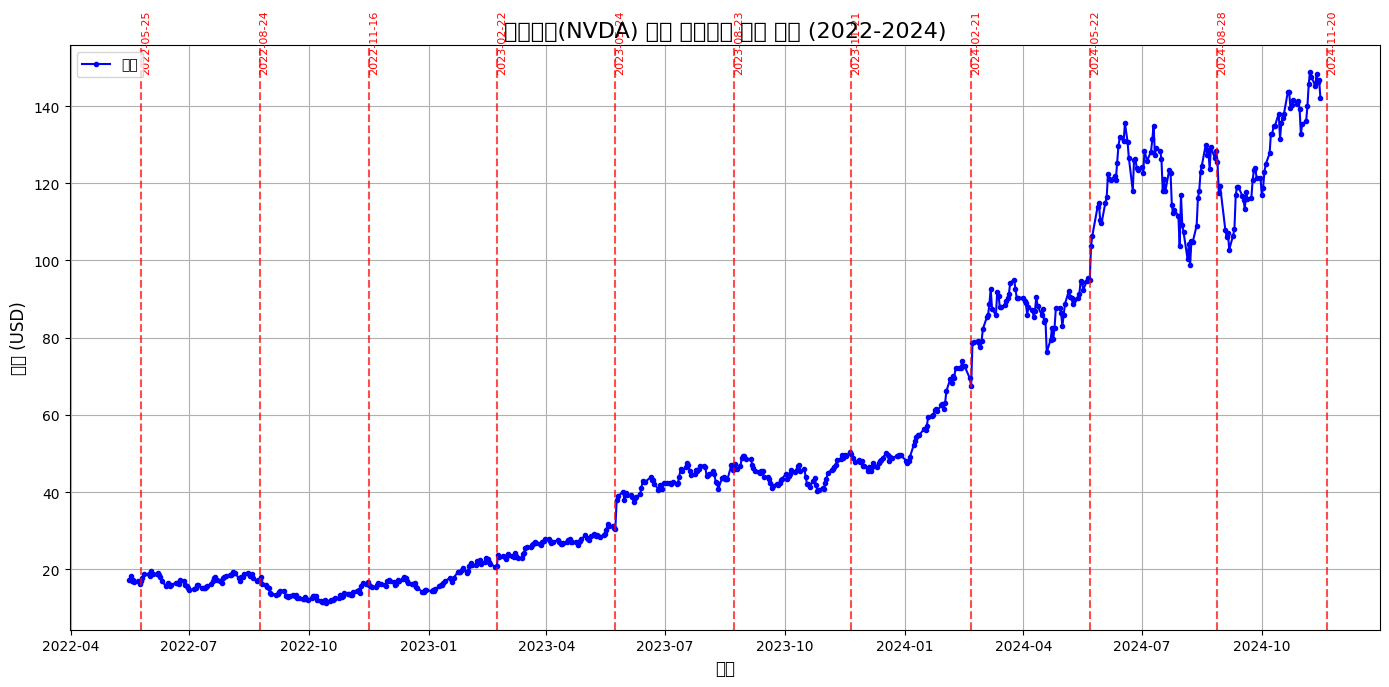

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import datetime

# 엔비디아 티커
ticker = 'NVDA'

# 실적 발표일 리스트 (2022년부터 현재까지)
earnings_dates = [
    datetime.datetime(2022, 5, 25),
    datetime.datetime(2022, 8, 24),
    datetime.datetime(2022, 11, 16),
    datetime.datetime(2023, 2, 22),
    datetime.datetime(2023, 5, 24),
    datetime.datetime(2023, 8, 23),
    datetime.datetime(2023, 11, 21),  # 예측 날짜
    datetime.datetime(2024, 2, 21),  # 예측 날짜
    datetime.datetime(2024, 5, 22),  # 예측 날짜
    datetime.datetime(2024, 8, 28),  # 예측 날짜
    datetime.datetime(2024, 11, 20), # 예측 날짜
]

# 주가 데이터 다운로드
start_date = earnings_dates[0] - datetime.timedelta(days=10)
end_date = earnings_dates[-1] + datetime.timedelta(days=10)
df = yf.download(ticker, start=start_date, end=end_date)

# 그래프 설정
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='종가', color='blue', linestyle='-', marker='.')

# 실적 발표일 표시
for date in earnings_dates:
    plt.axvline(x=date, color='red', linestyle='--', alpha=0.7)
    plt.text(date, df['Close'].max(), date.strftime('%Y-%m-%d'), rotation=90, fontsize=8, color='red')

# 그래프 제목 및 축 레이블 설정
plt.title('엔비디아(NVDA) 실적 발표일과 주가 흐름 (2022-2024)', fontsize=16)
plt.xlabel('날짜', fontsize=12)
plt.ylabel('주가 (USD)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()

# 그래프 출력
plt.show()


[*********************100%***********************]  1 of 1 completed

Analyzing BTC-USD...



<ipython-input-37-bae5e83a9fad>:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Volume'] = data['Volume'].replace(0, np.nan).fillna(method='bfill')


ValueError: Cannot set a DataFrame with multiple columns to the single column Bin_Index